## Observations and Insights 

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice.
total_trials = len(merge_df["Mouse ID"].unique())
total_trials

249

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupe_mouse

array(['g989'], dtype=object)

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_df = merge_df[merge_df["Mouse ID"] == 'g989'] 
dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"].isin(duplicate_mouse) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_df["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_data = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
grouped_data = summary_data.groupby(["Drug Regimen"])

summary_df = pd.DataFrame({
    "Mean": grouped_data["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": grouped_data["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": grouped_data["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": grouped_data["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": grouped_data["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": grouped_data["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summary_df

,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60
Placebo,54.03,52.29,45.00,61.17,7.82,0.58
Propriva,52.32,50.45,45.00,43.85,6.62,0.54
Ramicane,40.22,40.67,45.00,23.49,4.85,0.32
Stelasyn,54.23,52.43,45.00,59.45,7.71,0.57


In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df.agg

<bound method DataFrame.aggregate of                Mean Median   Mode Variance Standard Variance   SEM
Drug Regimen                                                      
Capomulin     40.68  41.56  45.00    24.95              4.99  0.33
Ceftamin      52.59  51.78  45.00    39.29              6.27  0.47
Infubinol     52.88  51.82  45.00    43.13              6.57  0.49
Ketapril      55.24  53.70  45.00    68.55              8.28  0.60
Naftisol      54.33  52.51  45.00    66.17              8.13  0.60
Placebo       54.03  52.29  45.00    61.17              7.82  0.58
Propriva      52.32  50.45  45.00    43.85              6.62  0.54
Ramicane      40.22  40.67  45.00    23.49              4.85  0.32
Stelasyn      54.23  52.43  45.00    59.45              7.71  0.57
Zoniferol     53.24  51.82  45.00    48.53              6.97  0.52>

## Bar and Pie Charts

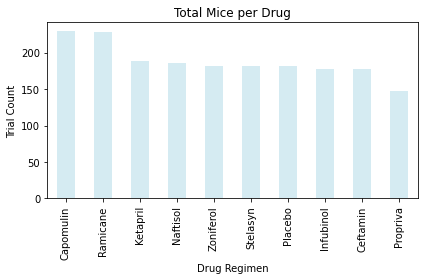

In [88]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_counts = clean_df["Drug Regimen"].value_counts()
x_axis = drug_counts.index
y_axis = drug_counts.values

count_chart = drug_counts.plot(kind = "bar", color = "lightblue", alpha = 0.5)

# Set x and y labels / Formatting
plt.ylabel("Trial Count")
plt.xlabel("Drug Regimen")
plt.title("Total Mice per Drug")
plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

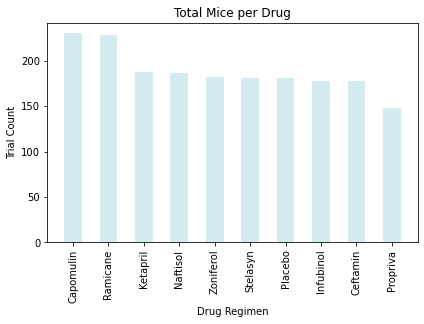

In [92]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_counts = clean_df["Drug Regimen"].value_counts()
y_axis = drug_counts.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs = drug_counts.index

plt.bar(x_drugs, y_axis, color = "lightblue", alpha = 0.5, width = 0.5, align = "center")

# Set x and y labels / Formatting
plt.ylabel("Trial Count")
plt.xlabel("Drug Regimen")
plt.title("Total Mice per Drug")
plt.tight_layout()
plt.xticks(rotation=90)

plt.show

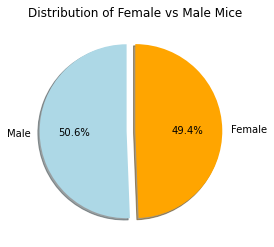

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count = merge_df["Sex"].value_counts()

# Labels for each section
labels = mf_count.values

# Values of each section 
sizes = mf_count.values

# Make into a pie chart
mf_count.plot(kind = "pie", autopct="%1.1f%%", colors = ["lightblue", "orange"], explode = [0.1, 0], shadow = True, startangle = 90)

# Formatting
plt.title("Distribution of Female vs Male Mice")
plt.ylabel(" ")
plt.show()

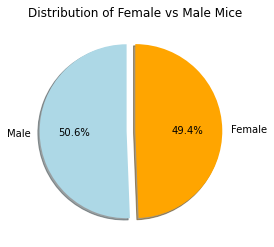

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count = merge_df["Sex"].value_counts()

# Labels for each section
labels = mf_count.index

# Values of each section 
sizes = mf_count.values

# Using Pandas to print
plt.pie(sizes, labels = labels, autopct="%1.1f%%", colors = ["lightblue", "orange"], explode = [0.1, 0], shadow = True, startangle = 90)

# Formatting
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [127]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin") | (merge_df["Drug Regimen"] == "Ramicane") | (merge_df["Drug Regimen"] == "Infubinol") | (merge_df["Drug Regimen"] == "Ceftamin"), :]

# Start by getting the last (greatest) timepoint for each mouse
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')

filtered_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_drugs = merge_df[merge_df["Drug Regimen"].isin(drug_list)]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
    quartiles = top_drugs[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq - lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

KeyError: 'Capomulin'

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

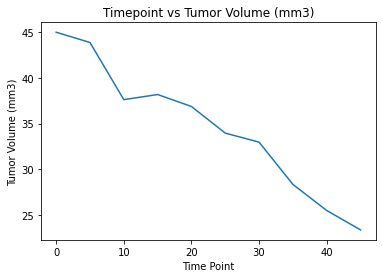

In [133]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_trials = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
cap_mouse = clean_df.loc[clean_df['Mouse ID'] == 's185']

plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

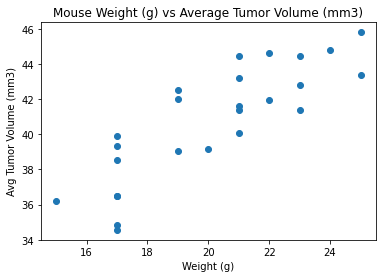

In [139]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

weight = cap_trials.groupby(cap_trials["Mouse ID"])["Weight (g)"].mean()
avg_tumor = cap_trials.groupby(cap_trials["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

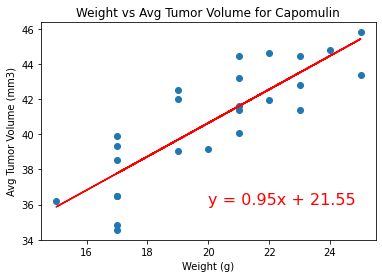

In [150]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(weight, avg_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight, avg_tumor)
plt.plot(weight, regress_values, color = "red")
plt.annotate(line_eq,(20,36), color = "red", fontsize = 16)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Weight vs Avg Tumor Volume for Capomulin")
plt.show()